<h1 style="text-align: center;">QML for Sine function </h1>

##Installing Pennylane

In [1]:
!pip install pennylane

##Importing Liabraries

In [2]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

##Generating Data

In this cell, we generate the data our model will learn from. We create sets of input and output values that represent a simple relationship (like a sine wave). We also generate separate data for testing how well our model performs later.

In [3]:
input_data=np.linspace(0,2*np.pi,10)
output_data=np.sin(input_data)
test_data=np.linspace(0.5,1.8*np.pi,10)
test_output=np.sin(test_data)

##Defining the Quantum Circuit

This is where we define the heart of our quantum machine learning model – *the quantum circuit*. It's a sequence of quantum operations that processes the input data and produces an output. Think of it as a recipe that the quantum computer follows.

In [4]:
dev=qml.device("default.qubit",wires=1)
@qml.qnode(dev) # Define a quantum node (function) to be executed on the device
def my_circuit(params,input): # Define the quantum circuit with parameters and input
  qml.RY(input,wires=0) # Apply a rotation around the Y-axis based on the input

  # Apply rotations around the X, Y, and Z axes based on parameters
  qml.RX(params[0],wires=0)
  qml.RY(params[1],wires=0)
  qml.RZ(params[2],wires=0)

  return qml.expval(qml.PauliZ(0))

##Defining the Cost Function

The cost function is our way of measuring how far off our model's predictions are from the actual answers. It calculates the error, which we aim to minimize during training.

In [5]:
def cost(params, input, output):
    params_np = np.array(params)
    predictions = np.array([my_circuit(params_np, x) for x in input]) # Make predictions using the quantum circuit
    cost_value = np.mean((predictions - output) ** 2) # Calculate the mean squared error (MSE) between predictions and actual outputs
    return cost_value

##Defining the Accuracy Function

The accuracy function is like a scorecard. It tells us what percentage of predictions our model gets right on the test data.

In [6]:
def accuracy(labels, predictions): # Calculate the accuracy of predictions compared to labels
    acc = sum(abs(l - p) < 1e-5 for l, p in zip(labels, predictions))
    acc = acc / len(labels)
    return acc

##Initializing the Optimizer

In [7]:
optimizer=qml.GradientDescentOptimizer(stepsize=0.1) # Initialize an optimizer with a learning rate

##Initializing Parameters

In [8]:
params=np.array([0.1,0.1,0.1],requires_grad=True) # Set initial parameter values

##Training and Testing

This is the training loop. We repeatedly use the optimizer to update the parameters of our model based on the calculated error (cost). It's like practicing and getting better over time.

In [9]:
for i in range(200):
    result = optimizer.step(cost, params, input_data, output_data) # Update parameters using the optimizer
    params = np.array(result[0]) # Extract updated parameters
    if (i+1) % 20 == 0:
        cost_value = cost(params, input_data, output_data) # Calculate the cost after each step
        test_predictions = [my_circuit(params, x_test) for x_test in test_data]
        test_accuracy = accuracy(test_output, test_predictions) # Calculate accuracy on the test data
        print(f"Iteration {i+1}: Cost = {cost_value}, Accuracy = {test_accuracy}")

Iteration 20: Cost = 0.04334048161465953, Accuracy = 0.0
Iteration 40: Cost = 0.0007058495882741867, Accuracy = 0.0
Iteration 60: Cost = 1.1412333156430229e-05, Accuracy = 0.0
Iteration 80: Cost = 1.8450004405608988e-07, Accuracy = 0.0
Iteration 100: Cost = 2.982756902828402e-09, Accuracy = 0.1
Iteration 120: Cost = 4.822133551826498e-11, Accuracy = 1.0
Iteration 140: Cost = 7.795798563486854e-13, Accuracy = 1.0
Iteration 160: Cost = 1.2603233489657905e-14, Accuracy = 1.0
Iteration 180: Cost = 2.0375269722299728e-16, Accuracy = 1.0
Iteration 200: Cost = 3.294009128432189e-18, Accuracy = 1.0


##Generating Test Predictions

After training, we use our model to generate predictions on the test data. This helps us evaluate how well it generalizes to new, unseen data.

In [10]:
test_predictions = []
for x_test in test_data: # Iterate over test inputs
    prediction = my_circuit(params,x_test) # Make predictions using the trained model
    test_predictions.append(prediction)

##Plotting Results

 Finally, we create a plot to visualize the results. We can see how well our model's predictions match the actual values, both for the training and test data. This helps us understand the performance of our quantum machine learning model.

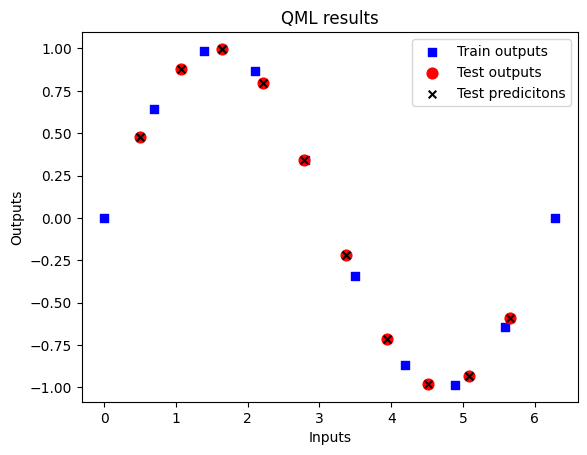

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(input_data, output_data, s=30, c='b', marker="s", label='Train outputs')
ax1.scatter(test_data,test_output, s=60, c='r', marker="o", label='Test outputs')
ax1.scatter(test_data,test_predictions, s=30, c='k', marker="x", label='Test predicitons')
plt.xlabel("Inputs")
plt.ylabel("Outputs")
plt.title("QML results")

plt.legend(loc='upper right');
plt.show()